# Veri Temizleme ve Özellik Mühendisliği

Bu notebook, EDA analizinden elde edilen bulgulara dayanarak veri temizleme ve özellik mühendisliği işlemlerini gerçekleştirir.

## İçerik
1. Kütüphanelerin Yüklenmesi
2. Veri Yükleme
3. Metin Sütunlarını Sayısala Çevirme
4. Aykırı Değer İşleme
5. Eksik Değer İşleme
6. Özellik Mühendisliği
7. Kategorik Değişken Dönüşümleri
8. Temizlenmiş Veriyi Kaydetme

## 1. Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
import re

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Kütüphaneler başarıyla yüklendi!")

Kütüphaneler başarıyla yüklendi!


## 2. Veri Yükleme

EDA notebook'undan kaydedilen işlenmiş veriyi yüklüyoruz.

In [2]:
# Veriyi yükle (EDA'dan kaydedilen dosya)
df = pd.read_csv('../outputs/data_eda_sonrasi.csv')

print(f"Veri boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")
print(f"
Sütunlar:")
print(df.columns.tolist())

Veri boyutu: 6675 satır, 31 sütun

Sütunlar:
['ilanBasligi', 'adres', 'il', 'fiyat(TRY)', 'ilanID', 'ilanTarihi', 'marka', 'seri', 'model', 'kilometre(Km)', 'yıl', 'vitesTipi', 'yakitTuru', 'kasaTipi', 'renk', 'motorHacmi(Cc)', 'motorGucu(HP)', 'cekisTipi', 'boyaParcaDurumu', 'takasUygunluk', 'saticiTuru', 'aracVergisi(TRY)', 'hasarGecmisi', 'orjinal_parça_sayısı', 'lokal_boyalı_parça_sayısı', 'boyalı_parça_sayısı', 'değişen_parça_sayısı', 'durumu_belirtilmemiş_parça_sayısı', 'fiyat_temiz', 'km_temiz', 'yil_temiz']


In [3]:
# İlk birkaç satırı incele
df.head()

,ilanBasligi,adres,il,fiyat(TRY),ilanID,ilanTarihi,marka,seri,model,kilometre(Km),...,aracVergisi(TRY),hasarGecmisi,orjinal_parça_sayısı,lokal_boyalı_parça_sayısı,boyalı_parça_sayısı,değişen_parça_sayısı,durumu_belirtilmemiş_parça_sayısı,fiyat_temiz,km_temiz,yil_temiz
0,2016 AUDİ A3 SPORTBACK 1.0 TFSI BOYASIZ/DEĞİŞE...,Aşağısoku Mh. Merkez,Bolu,1.169.000 TL,27812680,07 Nisan 2025,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,120.000 km,...,NaN,NaN,13,0,0,0,0,1169000,120000.0,2016.0
1,2018 AUDİ A6 2.0 TDI QUATTRO SUNROOF MATRİX VA...,Güneşevler Mh. Altındağ,Ankara,2.450.000 TL,28816234,07 Nisan 2025,Audi,A6,A6 Sedan 2.0 TDI Quattro,136.000 km,...,NaN,tutarı belirtilmemiş,8,0,4,1,0,2450000,136000.0,2018.0
2,Sahibinden Audi A4 Sedan 1.8 TFSI 2011 Model,Burmalı Mh. Merkez,Afyonkarahisar,750.000 TL,28781662,08 Nisan 2025,Audi,A4,A4 Sedan 1.8 TFSI,285.000 km,...,2.013,75.000,5,2,6,0,0,750000,285000.0,2011.0
3,2016 AUDI A3 AMBİENTE *CAM TAVAN LED XENON HIZ...,Ilıca Mh. Manavgat,Antalya,1.195.000 TL,28731117,03 Nisan 2025,Audi,A3,A3 Sportback 1.6 TDI Ambiente,101.000 km,...,1.606,tutarı yok,11,1,0,1,0,1195000,101000.0,2016.0
4,Sahibinden Audi A3 Sportback 1.6 TDI S-Line 20...,Uğur Mumcu Mh. Yenimahalle,Ankara,822.000 TL,28393351,02 Nisan 2025,Audi,A3,A3 Sportback 1.6 TDI Attraction,212.000 km,...,NaN,tutarı belirtilmemiş,12,1,0,0,0,822000,212000.0,2012.0


In [4]:
# Veri tiplerini kontrol et
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex:  entries, 0 to 
Data columns (total  columns):
#   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
0   ilanBasligi                         non-null   object 
adres                               non-null   object 
il                                  non-null   object 
fiyat(TRY)                          non-null   object 
ilanID                              non-null   int  
ilanTarihi                          non-null   object 
marka                               non-null   object 
seri                                non-null   object 
model                               non-null   object 
kilometre(Km)                       non-null   object 
0  yıl                                 non-null   float
vitesTipi                           non-null   object 
yakitTuru                           non-null   object 
kasaTipi                            non-null   object 
ren

## 3. Metin Sütunlarını Sayısala Çevirme

`motorGucu(HP)` ve `motorHacmi(Cc)` sütunları metin formatında. Bunları sayısal formata çeviriyoruz.

In [5]:
# Motor gücü sütununu incele
print("motorGucu(HP) Örnek Değerler:")
print(df['motorGucu(HP)'].dropna().head(0).tolist())

print("\n motorHacmi(Cc) Örnek Değerler:")
print(df['motorHacmi(Cc)'].dropna().head(0).tolist())

motorGucu(HP) Örnek Değerler:
['0 -  HP', '0 hp', '0 hp', '0 hp', '0 hp', '0 hp', '0 hp', '0 -  HP', ' hp', '0 -  HP', '0 hp', '0 hp', '0 -  HP', '0 hp', '0 -  HP', '0 -  HP', ' hp', '0 hp', '0 -  HP', '0 hp']
motorHacmi(Cc) Örnek Değerler:
["00 cm' e kadar", ' cc', ' cc', ' cc', ' cc', ' cc', ' cc', '0 - 00 cm', ' cc', '0 - 00 cm', ' cc', ' cc', '0 - 000 cm', ' cc', '0 - 00 cm', '0 - 00 cm', '0 cc', ' cc', "00 cm' e kadar", ' cc']


In [6]:
def temizle_motor_gucu(deger):
    """
    Motor gücü metnini sayıya çevirir.
    '0 hp' -> 0
    '0 -  HP' ->  (ortalama)
    """
    if pd.isna(deger):
        return np.nan
    
    deger_str = str(deger).lower().strip()
    
    # Aralık formatı: '0 -  HP'
    aralik_match = re.findall(r'(\d+)\s*-\s*(\d+)', deger_str)
    if aralik_match:
        alt, ust = int(aralik_match[0][0]), int(aralik_match[0][])
        return (alt + ust) /   # Ortalama al
    
    # Tekli format: '0 hp'
    tekli_match = re.findall(r'(\d+)', deger_str)
    if tekli_match:
        return int(tekli_match[0])
    
    return np.nan

# Uygula
df['motor_gucu_temiz'] = df['motorGucu(HP)'].apply(temizle_motor_gucu)

print("Motor Gücü Temizleme Sonucu:")
print(f"Orijinal eksik: {df['motorGucu(HP)'].isnull().sum()}")
print(f"Temiz eksik: {df['motor_gucu_temiz'].isnull().sum()}")
print(f"\n   İstatistikler:")
print(df['motor_gucu_temiz'].describe())

Motor Gücü Temizleme Sonucu:
Orijinal eksik: 
Temiz eksik: 
İstatistikler:
count    .000000
mean      0.0
std        .0
min        .000000
%        .000000
0%       00.000000
%       0.000000
max       .000000
Name: motor_gucu_temiz, dtype: float


In [7]:
def temizle_motor_hacmi(deger):
    """
    Motor hacmi metnini sayıya çevirir.
    ' cc' -> 
    '.' -> 00
    '0 - 00 cc' -> 00 (ortalama)
    """
    if pd.isna(deger):
        return np.nan
    
    deger_str = str(deger).lower().strip()
    
    # Aralık formatı: '0 - 00 cc'
    aralik_match = re.findall(r'(\d+)\s*-\s*(\d+)', deger_str)
    if aralik_match:
        alt, ust = int(aralik_match[0][0]), int(aralik_match[0][])
        return (alt + ust) / 
    
    # cc formatı: ' cc'
    cc_match = re.findall(r'(\d+)\s*cc', deger_str)
    if cc_match:
        return int(cc_match[0])
    
    # Sadece sayı
    sayi_match = re.findall(r'(\d+)', deger_str)
    if sayi_match:
        sayi = int(sayi_match[0])
        # Eğer çok küçükse (litre formatı olabilir), 000 ile çarp
        if sayi < 0:
            return sayi * 000
        return sayi
    
    return np.nan

# Uygula
df['motor_hacmi_temiz'] = df['motorHacmi(Cc)'].apply(temizle_motor_hacmi)

print("Motor Hacmi Temizleme Sonucu:")
print(f"Orijinal eksik: {df['motorHacmi(Cc)'].isnull().sum()}")
print(f"Temiz eksik: {df['motor_hacmi_temiz'].isnull().sum()}")
print(f"\n   İstatistikler:")
print(df['motor_hacmi_temiz'].describe())

Motor Hacmi Temizleme Sonucu:
Orijinal eksik: 
Temiz eksik: 
İstatistikler:
count    .000000
mean     .0
std       .
min       .000000
%      .000000
0%      .000000
%      .000000
max      00.000000
Name: motor_hacmi_temiz, dtype: float


## 4. Aykırı Değer İşleme

### 4.1 Kilometre Aykırı Değerleri

EDA'da tespit edilen ,, km gibi mantık dışı değerleri temizliyoruz.

In [8]:
# Kilometre dağılımını kontrol et
print("Kilometre İstatistikleri (Temizleme Öncesi):")
print(df['km_temiz'].describe())

# Mantık dışı km değerlerini tespit et ( milyon km üzeri)
mantik_disi_km = df[df['km_temiz'] > 1_000_000]
print(f"\n  milyon km üzeri kayıt sayısı: {len(mantik_disi_km)}")

Kilometre İstatistikleri (Temizleme Öncesi):
count    .000e+0
mean     .00e+0
std      .e+0
min      0.000000e+00
%      .0000e+0
0%      .000000e+0
%      .0000e+0
max      .000000e+0
Name: km_temiz, dtype: float
milyon km üzeri kayıt sayısı: 


In [9]:
# Kilometre için makul sınır belirle (max  milyon km)
km_max_sinir = 1_000_000

# Aykırı değerleri filtrele
df_temiz = df[df['km_temiz'] <= km_max_sinir].copy()

print(f"Kilometre temizleme sonrası: {len(df)} -> {len(df_temiz)} kayıt")
print(f"Silinen kayıt: {len(df) - len(df_temiz)}")

Kilometre temizleme sonrası:  ->  kayıt
Silinen kayıt: 


In [10]:
# IQR yöntemi ile aykırı değer tespiti fonksiyonu
def tespit_aykiri_iqr(series, carpan=.):
    """
    IQR yöntemi ile aykırı değerleri tespit eder.
    
    Parameters:
    -----------
    series: pd.Series - Analiz edilecek sütun
    carpan: float - IQR çarpanı (varsayılan .)
    
    Returns:
    --------
    alt_sinir, ust_sinir, aykiri_maske
    """
    Q = series.quantile(0.)
    Q = series.quantile(0.)
    IQR = Q - Q
    
    alt_sinir = Q - (carpan * IQR)
    ust_sinir = Q + (carpan * IQR)
    
    aykiri_maske = (series < alt_sinir) | (series > ust_sinir)
    
    return alt_sinir, ust_sinir, aykiri_maske

print("IQR fonksiyonu tanımlandı")

IQR fonksiyonu tanımlandı


### 4.2 Fiyat Aykırı Değerleri

Fiyat için IQR yöntemini uyguluyoruz, ancak lüks araçları tamamen silmemek için daha esnek bir yaklaşım kullanacağız.

Fiyat Aykırı Değer Analizi (IQR x ):
Alt sınır: -,00,000 TL
Üst sınır: ,,0 TL
Aykırı değer sayısı: 


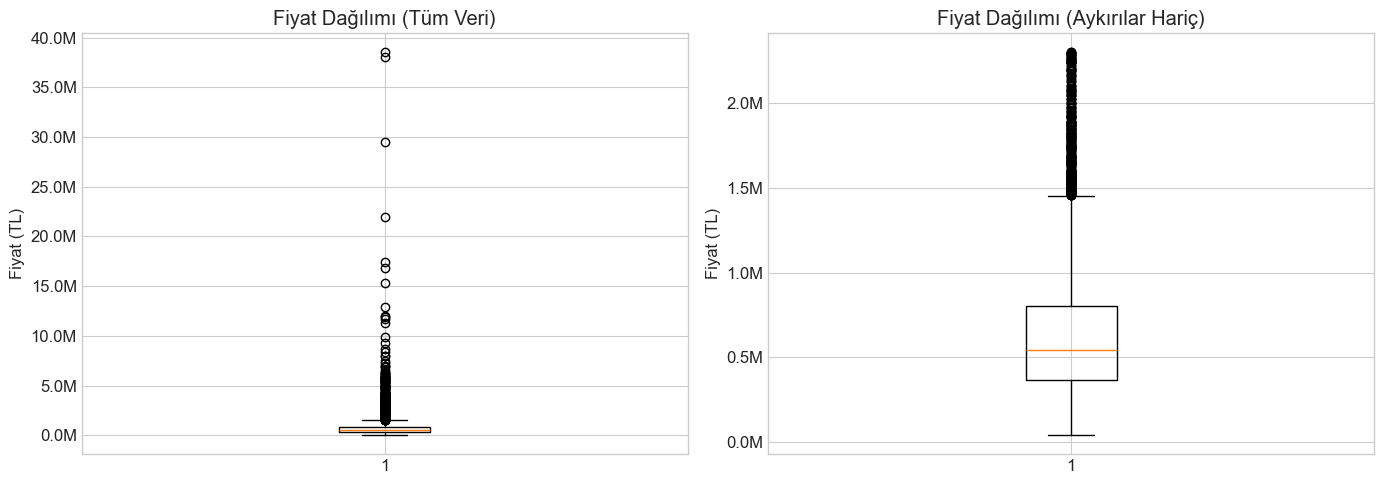

Not: Lüks araçları korumak için fiyat aykırı değerlerini şu an silmiyoruz.
Model eğitiminde log dönüşümü kullanacağız.


In [11]:
# Fiyat aykırı değerlerini tespit et
alt_sinir, ust_sinir, fiyat_aykiri = tespit_aykiri_iqr(df_temiz['fiyat_temiz'], carpan=.0)

print(f"Fiyat Aykırı Değer Analizi (IQR x ):")
print(f"Alt sınır: {alt_sinir:,.0f} TL")
print(f"Üst sınır: {ust_sinir:,.0f} TL")
print(f"Aykırı değer sayısı: {fiyat_aykiri.sum()}")

# Box plot ile görselleştir
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tüm veri
axes[0].boxplot(df_temiz['fiyat_temiz'].dropna(), vert=True)
axes[0].set_title('Fiyat Dağılımı (Tüm Veri)')
axes[0].set_ylabel('Fiyat (TL)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/e:.f}M'))

# Aykırılar hariç
fiyat_temiz = df_temiz.loc[~fiyat_aykiri, 'fiyat_temiz']
axes[1].boxplot(fiyat_temiz.dropna(), vert=True)
axes[1].set_title('Fiyat Dağılımı (Aykırılar Hariç)')
axes[1].set_ylabel('Fiyat (TL)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/e:.f}M'))

plt.tight_layout()
plt.savefig('../outputs/figures/fiyat_aykiri_karsilastirma.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Not: Lüks araçları korumak için fiyat aykırı değerlerini şu an silmiyoruz.")
print("Model eğitiminde log dönüşümü kullanacağız.")

## 5. Eksik Değer İşleme

EDA'dan elde edilen bulgulara göre eksik değerleri işliyoruz.

In [12]:
# Eksik değer durumunu kontrol et
eksik_ozet = df_temiz.isnull().sum()
eksik_yuzde = (eksik_ozet / len(df_temiz)) * 00

eksik_df = pd.DataFrame({
    'Eksik Sayısı': eksik_ozet,
    'Eksik Oranı (%)': eksik_yuzde.round()
}).sort_values('Eksik Oranı (%)', ascending=False)

print("Eksik Değer Özeti:")
print(eksik_df[eksik_df['Eksik Sayısı'] > 0])

Eksik Değer Özeti:
Eksik Sayısı  Eksik Oranı (%)
aracVergisi(TRY)                       0.
takasUygunluk                          .
hasarGecmisi                           .
saticiTuru                 0            .0
renk                                   .
cekisTipi                                .
motor_gucu_temiz                         .
motorGucu(HP)                            .
motorHacmi(Cc)              0             .
motor_hacmi_temiz           0             .
kasaTipi                                 .
yakitTuru                                  0.0
model                                      0.0


### 5.1 Yüksek Eksiklik Oranına Sahip Sütunları Silme

`aracVergisi(TRY)` sütunu %0+ eksik olduğu için siliyoruz.

In [13]:
# Çok yüksek eksiklik oranına sahip ve gereksiz sütunları sil
sutunlar_silinecek = ['aracVergisi(TRY)', 'motorGucu(HP)', 'motorHacmi(Cc)', 
                       'ilanBasligi', 'adres', 'ilanID', 'ilanTarihi', 'boyaParcaDurumu']

# Sütun var mı kontrol et ve sil
for sutun in sutunlar_silinecek:
    if sutun in df_temiz.columns:
        df_temiz = df_temiz.drop(columns=[sutun])
        print(f"'{sutun}' sütunu silindi")

print(f"\n Güncel sütun sayısı: {len(df_temiz.columns)}")

'aracVergisi(TRY)' sütunu silindi
'motorGucu(HP)' sütunu silindi
'motorHacmi(Cc)' sütunu silindi
'ilanBasligi' sütunu silindi
'adres' sütunu silindi
'ilanID' sütunu silindi
'ilanTarihi' sütunu silindi
'boyaParcaDurumu' sütunu silindi
Güncel sütun sayısı: 


### . Kategorik Değişkenler için Eksik Değer İşleme

In [14]:
# Kategorik sütunlarda eksik değerleri "Bilinmiyor" ile doldur
kategorik_sutunlar = ['takasUygunluk', 'hasarGecmisi', 'saticiTuru', 'renk', 
                       'cekisTipi', 'kasaTipi', 'yakitTuru', 'vitesTipi']

for sutun in kategorik_sutunlar:
    if sutun in df_temiz.columns:
        eksik_sayisi = df_temiz[sutun].isnull().sum()
        if eksik_sayisi > 0:
            df_temiz[sutun] = df_temiz[sutun].fillna('Bilinmiyor')
            print(f"'{sutun}': {eksik_sayisi} eksik değer 'Bilinmiyor' ile dolduruldu")

print("\n Kategorik değişkenler işlendi!")

'takasUygunluk':  eksik değer 'Bilinmiyor' ile dolduruldu
'hasarGecmisi':  eksik değer 'Bilinmiyor' ile dolduruldu
'saticiTuru': 0 eksik değer 'Bilinmiyor' ile dolduruldu
'renk':  eksik değer 'Bilinmiyor' ile dolduruldu
'cekisTipi':  eksik değer 'Bilinmiyor' ile dolduruldu
'kasaTipi':  eksik değer 'Bilinmiyor' ile dolduruldu
'yakitTuru':  eksik değer 'Bilinmiyor' ile dolduruldu
Kategorik değişkenler işlendi!


### . Sayısal Değişkenler için Eksik Değer İşleme

In [15]:
# Sayısal sütunlarda eksik değerleri medyan ile doldur
sayisal_sutunlar = ['motor_gucu_temiz', 'motor_hacmi_temiz', 'km_temiz', 'yil_temiz',
                    'orjinal_parça_sayısı', 'lokal_boyalı_parça_sayısı', 
                    'boyalı_parça_sayısı', 'değişen_parça_sayısı']

for sutun in sayisal_sutunlar:
    if sutun in df_temiz.columns:
        eksik_sayisi = df_temiz[sutun].isnull().sum()
        if eksik_sayisi > 0:
            medyan = df_temiz[sutun].median()
            df_temiz[sutun] = df_temiz[sutun].fillna(medyan)
            print(f"'{sutun}': {eksik_sayisi} eksik değer medyan ({medyan:.0f}) ile dolduruldu")

print("\n Sayısal değişkenler işlendi!")

'motor_gucu_temiz':  eksik değer medyan (00) ile dolduruldu
'motor_hacmi_temiz': 0 eksik değer medyan () ile dolduruldu
Sayısal değişkenler işlendi!


In [16]:
# Fiyat ve model sütunlarında eksik olan satırları sil (hedef değişken eksik olamaz)
onceki_boyut = len(df_temiz)

# Fiyat eksik olanları sil
df_temiz = df_temiz.dropna(subset=['fiyat_temiz'])

# Model eksik olanları sil (önemli bir özellik)
if 'model' in df_temiz.columns:
    df_temiz = df_temiz.dropna(subset=['model'])

print(f"Kritik sütunlarda eksik değer olan satırlar silindi: {onceki_boyut} -> {len(df_temiz)}")

Kritik sütunlarda eksik değer olan satırlar silindi:  -> 


In [17]:
# Son eksik değer durumunu kontrol et
eksik_son = df_temiz.isnull().sum()
print("Eksik Değer Kontrolü (Son Durum):")
eksik_kalan = eksik_son[eksik_son > 0]
if len(eksik_kalan) > 0:
    print(eksik_kalan)
else:
    print("Tüm eksik değerler işlendi! Veri setinde eksik değer kalmadı.")

Eksik Değer Kontrolü (Son Durum):
Tüm eksik değerler işlendi! Veri setinde eksik değer kalmadı.


## 6. Özellik Mühendisliği

Yeni özellikler oluşturarak modelin tahmin gücünü artırıyoruz.

### . Araç Yaşı

Araç Yaşı İstatistikleri:
count    .000000
mean       .0
std         .0
min         0.000000
%         .000000
0%        .000000
%        .000000
max        .000000
Name: arac_yasi, dtype: float


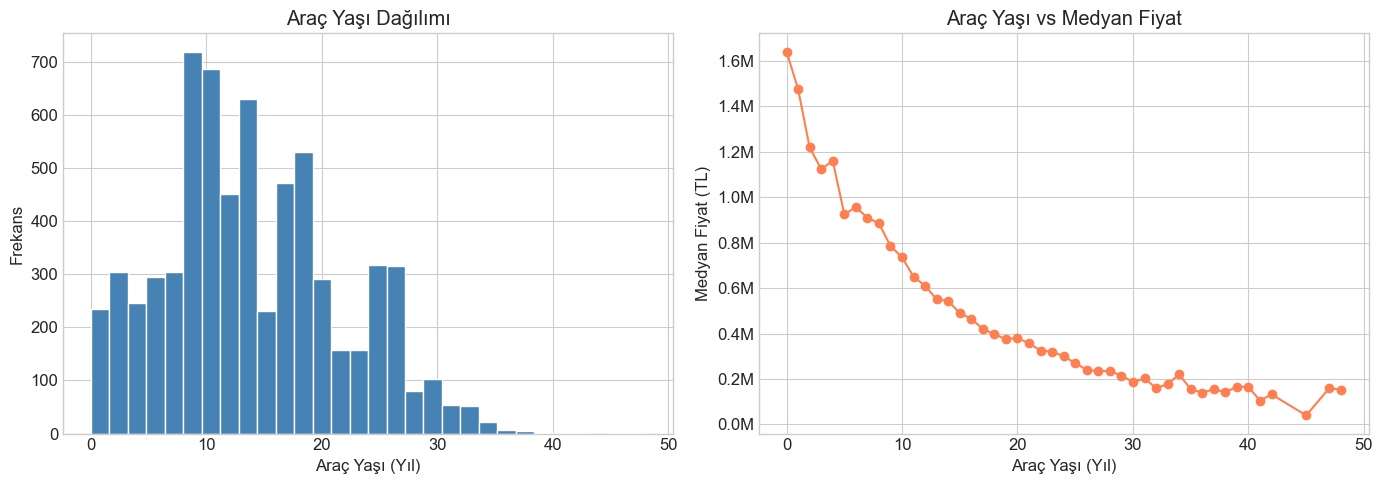

In [18]:
# Araç yaşını hesapla
GUNCEL_YIL = 0

df_temiz['arac_yasi'] = GUNCEL_YIL - df_temiz['yil_temiz']

# Negatif yaşları düzelt (gelecek model yılları için)
df_temiz['arac_yasi'] = df_temiz['arac_yasi'].clip(lower=0)

print("Araç Yaşı İstatistikleri:")
print(df_temiz['arac_yasi'].describe())

# Görselleştir
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Araç yaşı dağılımı
df_temiz['arac_yasi'].hist(bins=50, ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('Araç Yaşı Dağılımı')
axes[0].set_xlabel('Araç Yaşı (Yıl)')
axes[0].set_ylabel('Frekans')

# Araç yaşı vs fiyat
yas_fiyat = df_temiz.groupby('arac_yasi')['fiyat_temiz'].median()
axes[1].plot(yas_fiyat.index, yas_fiyat.values, marker='o', color='coral')
axes[1].set_title('Araç Yaşı vs Medyan Fiyat')
axes[1].set_xlabel('Araç Yaşı (Yıl)')
axes[1].set_ylabel('Medyan Fiyat (TL)')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/e:.f}M'))

plt.tight_layout()
plt.savefig('../outputs/figures/arac_yasi_analiz.png', dpi=150, bbox_inches='tight')
plt.show()

### . Kilometre / Yaş Oranı

In [19]:
# Yıllık ortalama km hesapla
# 0 yaşındaki araçlar için bölme hatasını önle
df_temiz['km_per_yas'] = df_temiz.apply(
    lambda row: row['km_temiz'] / row['arac_yasi'] if row['arac_yasi'] > 0 else row['km_temiz'],
    axis=
)

print("Yıllık Ortalama KM İstatistikleri:")
print(df_temiz['km_per_yas'].describe())

# Aykırı değerleri temizle (yılda 00.000 km üzeri mantıksız)
km_per_yas_max = 00_000
df_temiz['km_per_yas'] = df_temiz['km_per_yas'].clip(upper=km_per_yas_max)

print(f"\n Yıllık KM oranı {km_per_yas_max:,} ile sınırlandırıldı")

Yıllık Ortalama KM İstatistikleri:
count      .000000
mean      0.00
std       000.
min           0.000000
%       .00000
0%       0.
%       0.
max      000.000000
Name: km_per_yas, dtype: float
Yıllık KM oranı 00,000 ile sınırlandırıldı


### . Hasar Skoru

Gerçek sütun isimleri:
- `orjinal_parça_sayısı`
- `lokal_boyalı_parça_sayısı`
- `boyalı_parça_sayısı`
- `değişen_parça_sayısı`

In [20]:
# Hasar geçmişi sütunlarını incele (doğru isimlerle)
hasar_sutunlari = ['orjinal_parça_sayısı', 'lokal_boyalı_parça_sayısı', 
                   'boyalı_parça_sayısı', 'değişen_parça_sayısı']

print("Hasar Sütunları Durumu:")
for sutun in hasar_sutunlari:
    if sutun in df_temiz.columns:
        print(f"{sutun}: mevcut")
    else:
        print(f"{sutun}: yok")

Hasar Sütunları Durumu:
orjinal_parça_sayısı: mevcut
lokal_boyalı_parça_sayısı: mevcut
boyalı_parça_sayısı: mevcut
değişen_parça_sayısı: mevcut


In [21]:
# Hasar skoru hesapla (ağırlıklı toplam)
def hesapla_hasar_skoru(row):
    """
    Hasar skoru hesaplar:
    - Orijinal parça: 0 puan (hasar yok)
    - Lokal boyalı parça:  puan (hafif)
    - Boyalı parça:  puan (orta)
    - Değişen parça:  puan (ağır)
    """
    skor = 0
    
    # Lokal boyalı parça (hafif hasar)
    if 'lokal_boyalı_parça_sayısı' in row.index:
        val = row['lokal_boyalı_parça_sayısı']
        if pd.notna(val):
            try:
                skor += float(val) * 
            except:
                pass
    
    # Boyalı parça (orta hasar)
    if 'boyalı_parça_sayısı' in row.index:
        val = row['boyalı_parça_sayısı']
        if pd.notna(val):
            try:
                skor += float(val) * 
            except:
                pass
    
    # Değişen parça (ağır hasar)
    if 'değişen_parça_sayısı' in row.index:
        val = row['değişen_parça_sayısı']
        if pd.notna(val):
            try:
                skor += float(val) * 
            except:
                pass
    
    return skor

# Hasar sütunları varsa skoru hesapla
if any(sutun in df_temiz.columns for sutun in hasar_sutunlari):
    df_temiz['hasar_skoru'] = df_temiz.apply(hesapla_hasar_skoru, axis=)
    print("Hasar Skoru İstatistikleri:")
    print(df_temiz['hasar_skoru'].describe())
else:
    print("Hasar sütunları bulunamadı, hasar skoru 0 olarak atanıyor")
    df_temiz['hasar_skoru'] = 0

Hasar Skoru İstatistikleri:
count    .000000
mean        .
std         .
min         0.000000
%         0.000000
0%         .000000
%         .000000
max        .000000
Name: hasar_skoru, dtype: float


### . Fiyat Log Dönüşümü

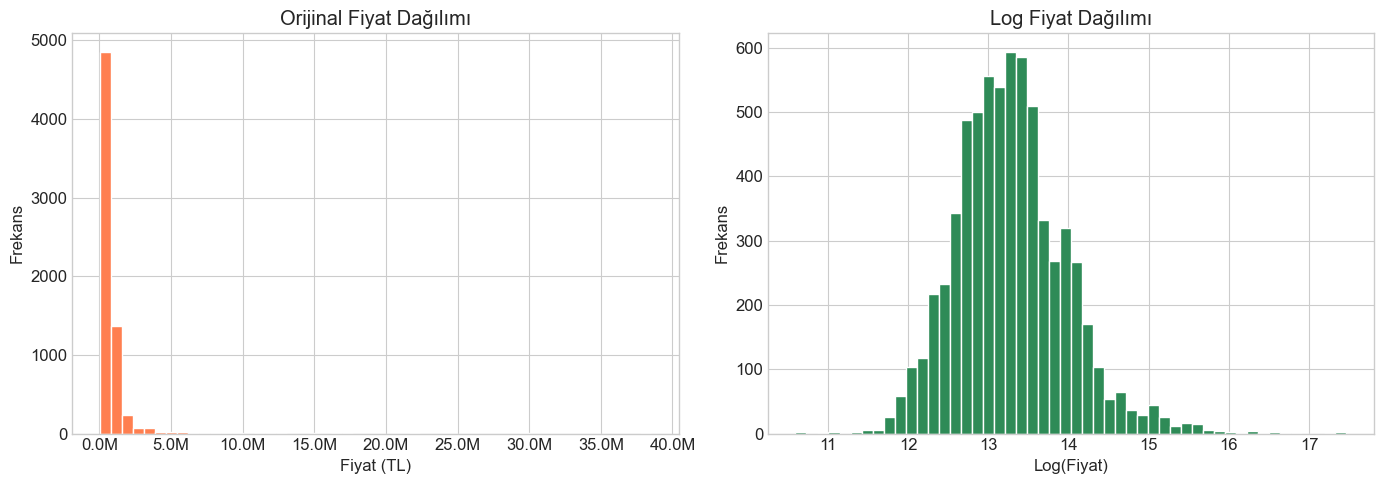

Log dönüşümü tamamlandı! Dağılım artık daha normal.


In [22]:
# Log fiyat hesapla (sağa çarpık dağılımı normalize etmek için)
df_temiz['log_fiyat'] = np.logp(df_temiz['fiyat_temiz'])

# Dönüşüm öncesi ve sonrası karşılaştır
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Orijinal fiyat dağılımı
df_temiz['fiyat_temiz'].hist(bins=50, ax=axes[0], color='coral', edgecolor='white')
axes[0].set_title('Orijinal Fiyat Dağılımı')
axes[0].set_xlabel('Fiyat (TL)')
axes[0].set_ylabel('Frekans')
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/e:.f}M'))

# Log fiyat dağılımı
df_temiz['log_fiyat'].hist(bins=50, ax=axes[], color='seagreen', edgecolor='white')
axes[1].set_title('Log Fiyat Dağılımı')
axes[1].set_xlabel('Log(Fiyat)')
axes[1].set_ylabel('Frekans')

plt.tight_layout()
plt.savefig('../outputs/figures/fiyat_log_donusum.png', dpi=150, bbox_inches='tight')
plt.show()

print("Log dönüşümü tamamlandı! Dağılım artık daha normal.")

### . Marka Popülerlik Skoru

In [23]:
# Marka bazlı istatistikler
if 'marka' in df_temiz.columns:
    marka_stats = df_temiz.groupby('marka').agg({
        'fiyat_temiz': ['mean', 'median', 'count']
    }).round(0)
    
    marka_stats.columns = ['ortalama_fiyat', 'medyan_fiyat', 'ilan_sayisi']
    marka_stats = marka_stats.sort_values('ilan_sayisi', ascending=False)
    
    # Marka popülerlik skoru (ilan sayısına göre)
    marka_populerlik = marka_stats['ilan_sayisi'].to_dict()
    df_temiz['marka_populerlik'] = df_temiz['marka'].map(marka_populerlik)
    
    # Log ölçekleme
    df_temiz['marka_populerlik_log'] = np.logp(df_temiz['marka_populerlik'])
    
    print("En Popüler 0 Marka:")
    print(marka_stats.head(0))
    
    print("\n Marka popülerlik skoru eklendi!")

En Popüler 0 Marka:
ortalama_fiyat  medyan_fiyat  ilan_sayisi
marka                                                
Renault           .0      000.0         0
Volkswagen        0.0      .0          0
Fiat              .0      0000.0          
Opel              0.0      0000.0          
BMW              .0     000.0          
Peugeot           000.0      000.0          
Toyota            .0      000.0          
Ford              0.0      000.0          
Audi             .0     0000.0          
Hyundai           0.0      0000.0          
Marka popülerlik skoru eklendi!


## 7. Kategorik Değişken Dönüşümleri

CatBoost kategorik değişkenleri otomatik işleyebildiği için şu an sadece hangi sütunların kategorik olduğunu belirliyoruz.

In [24]:
# Kategorik ve sayısal sütunları belirle
kategorik_ozellikler = [
    'marka', 'model', 'seri', 'renk', 'yakitTuru', 'vitesTipi', 
    'cekisTipi', 'kasaTipi', 'saticiTuru', 'il', 
    'takasUygunluk', 'hasarGecmisi'
]

sayisal_ozellikler = [
    'fiyat_temiz', 'km_temiz', 'yil_temiz', 'motor_gucu_temiz',
    'motor_hacmi_temiz', 'arac_yasi', 'km_per_yas', 'hasar_skoru',
    'log_fiyat', 'marka_populerlik_log',
    'orjinal_parça_sayısı', 'lokal_boyalı_parça_sayısı',
    'boyalı_parça_sayısı', 'değişen_parça_sayısı'
]

# Mevcut sütunları filtrele
kategorik_mevcut = [col for col in kategorik_ozellikler if col in df_temiz.columns]
sayisal_mevcut = [col for col in sayisal_ozellikler if col in df_temiz.columns]

print(f"Kategorik Özellikler ({len(kategorik_mevcut)}):")
print(kategorik_mevcut)

print(f"\n Sayısal Özellikler ({len(sayisal_mevcut)}):")
print(sayisal_mevcut)

Kategorik Özellikler ():
['marka', 'model', 'seri', 'renk', 'yakitTuru', 'vitesTipi', 'cekisTipi', 'kasaTipi', 'saticiTuru', 'il', 'takasUygunluk', 'hasarGecmisi']
Sayısal Özellikler ():
['fiyat_temiz', 'km_temiz', 'yil_temiz', 'motor_gucu_temiz', 'motor_hacmi_temiz', 'arac_yasi', 'km_per_yas', 'hasar_skoru', 'log_fiyat', 'marka_populerlik_log', 'orjinal_parça_sayısı', 'lokal_boyalı_parça_sayısı', 'boyalı_parça_sayısı', 'değişen_parça_sayısı']


In [25]:
# Kategorik sütunların benzersiz değer sayılarını incele
print("Kategorik Değişkenlerin Kardinalitesi:")
print("-" * 0)

for col in kategorik_mevcut:
    n_unique = df_temiz[col].nunique()
    print(f"{col}: {n_unique} benzersiz değer")

Kategorik Değişkenlerin Kardinalitesi:
----------------------------------------
marka:  benzersiz değer
model:  benzersiz değer
seri:  benzersiz değer
renk:  benzersiz değer
yakitTuru:  benzersiz değer
vitesTipi:  benzersiz değer
cekisTipi:  benzersiz değer
kasaTipi: 0 benzersiz değer
saticiTuru:  benzersiz değer
il:  benzersiz değer
takasUygunluk:  benzersiz değer
hasarGecmisi: 0 benzersiz değer


In [26]:
# Kategorik sütunları string tipine çevir (CatBoost için)
for col in kategorik_mevcut:
    df_temiz[col] = df_temiz[col].astype(str)

print("Kategorik sütunlar string tipine dönüştürüldü")

Kategorik sütunlar string tipine dönüştürüldü


## Son Kontroller ve Veriyi Kaydetme

In [27]:
# Son veri setini incele
print("Temizlenmiş Veri Seti Özeti:")
print("=" * 0)
print(f"Toplam satır: {len(df_temiz):,}")
print(f"Toplam sütun: {len(df_temiz.columns)}")
print(f"\nSütunlar:")
print(df_temiz.columns.tolist())

print(f"\n Sayısal Sütun İstatistikleri:")
df_temiz[sayisal_mevcut].describe()

Temizlenmiş Veri Seti Özeti:
Toplam satır: ,
Toplam sütun: 

Sütunlar:
['il', 'fiyat(TRY)', 'marka', 'seri', 'model', 'kilometre(Km)', 'yıl', 'vitesTipi', 'yakitTuru', 'kasaTipi', 'renk', 'cekisTipi', 'takasUygunluk', 'saticiTuru', 'hasarGecmisi', 'orjinal_parça_sayısı', 'lokal_boyalı_parça_sayısı', 'boyalı_parça_sayısı', 'değişen_parça_sayısı', 'durumu_belirtilmemiş_parça_sayısı', 'fiyat_temiz', 'km_temiz', 'yil_temiz', 'motor_gucu_temiz', 'motor_hacmi_temiz', 'arac_yasi', 'km_per_yas', 'hasar_skoru', 'log_fiyat', 'marka_populerlik', 'marka_populerlik_log']
Sayısal Sütun İstatistikleri:


,fiyat_temiz,km_temiz,yil_temiz,motor_gucu_temiz,motor_hacmi_temiz,arac_yasi,km_per_yas,hasar_skoru,log_fiyat,marka_populerlik_log,orjinal_parça_sayısı,lokal_boyalı_parça_sayısı,boyalı_parça_sayısı,değişen_parça_sayısı
count,6.671000e+03,6671.000000,6671.000000,6671.000000,6671.00000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000
mean,7.865255e+05,201738.308499,2010.086644,109.907960,1511.09249,13.913806,17124.479806,5.939289,13.277508,6.364346,5.492730,0.478639,1.970319,0.506671
std,1.165180e+06,98040.449906,7.731087,42.950069,281.73267,7.730248,9399.434963,7.411329,0.690475,0.748487,5.673545,1.090693,3.197969,0.904715
min,4.000000e+04,0.000000,1976.000000,45.000000,898.00000,0.000000,0.000000,0.000000,10.596660,0.693147,0.000000,0.000000,0.000000,0.000000
25%,3.690000e+05,135000.000000,2005.000000,88.000000,1368.00000,8.000000,11187.500000,0.000000,12.818555,6.270988,0.000000,0.000000,0.000000,0.000000
50%,5.590000e+05,200000.000000,2011.000000,100.000000,1499.00000,13.000000,15038.461538,3.000000,13.233907,6.324359,3.000000,0.000000,0.000000,0.000000
75%,8.550000e+05,266000.000000,2016.000000,117.000000,1598.00000,19.000000,20636.363636,9.000000,13.658858,6.697034,12.000000,1.000000,3.000000,1.000000
max,3.850000e+07,1000000.000000,2025.000000,626.000000,6001.00000,48.000000,100000.000000,35.000000,17.466169,6.981935,13.000000,11.000000,13.000000,9.000000


In [28]:
# Eksik değer kontrolü
eksik_kontrol = df_temiz.isnull().sum()
eksik_var = eksik_kontrol[eksik_kontrol > 0]

if len(eksik_var) == 0:
    print("Veri setinde eksik değer yok!")
else:
    print("Hala eksik değerler var:")
    print(eksik_var)
    
    # Kalan eksik değerleri doldur
    for col in eksik_var.index:
        if df_temiz[col].dtype == 'object':
            df_temiz[col] = df_temiz[col].fillna('Bilinmiyor')
        else:
            df_temiz[col] = df_temiz[col].fillna(df_temiz[col].median())
    print("\n Kalan eksik değerler dolduruldu!")

Veri setinde eksik değer yok!


In [29]:
# Özellik metadata'sını kaydet
ozellik_meta = {
    'kategorik_ozellikler': kategorik_mevcut,
    'sayisal_ozellikler': sayisal_mevcut,
    'hedef_degisken': 'fiyat_temiz',
    'log_hedef': 'log_fiyat',
    'toplam_satir': len(df_temiz),
    'toplam_sutun': len(df_temiz.columns)
}

import json

with open('../outputs/ozellik_meta.json', 'w', encoding='utf-8') as f:
    json.dump(ozellik_meta, f, ensure_ascii=False, indent=)

print("Özellik metadata'sı kaydedildi: outputs/ozellik_meta.json")

Özellik metadata'sı kaydedildi: outputs/ozellik_meta.json


In [30]:
# Temizlenmiş veriyi kaydet
df_temiz.to_csv('../outputs/cleaned_data.csv', index=False)
print(f"Temizlenmiş veri kaydedildi: outputs/cleaned_data.csv")
print(f"Boyut: {len(df_temiz):,} satır x {len(df_temiz.columns)} sütun")

Temizlenmiş veri kaydedildi: outputs/cleaned_data.csv
Boyut: , satır x  sütun


## Özet

### Yapılan İşlemler:

**Metin Sütunlarını Temizleme**
   - `motorGucu(HP)` -> `motor_gucu_temiz` (sayısal)
   - `motorHacmi(Cc)` -> `motor_hacmi_temiz` (sayısal)

**Aykırı Değer İşleme**
   - Kilometre >  milyon filtrelendi
   - Fiyat aykırı değerleri log dönüşümü ile yönetilecek

**Eksik Değer İşleme**
   - `aracVergisi(TRY)` silindi (%0+ eksik)
   - Kategorik değişkenler: "Bilinmiyor" ile dolduruldu
   - Sayısal değişkenler: Medyan ile dolduruldu

**Özellik Mühendisliği**
   - `arac_yasi`: Araç yaşı (0 - yıl)
   - `km_per_yas`: Yıllık ortalama km
   - `hasar_skoru`: Ağırlıklı hasar skoru (lokal x, boyalı x, değişen x)
   - `log_fiyat`: Log dönüşümlü fiyat
   - `marka_populerlik_log`: Marka popülerlik skoru

**Çıktılar**
   - `cleaned_data.csv`: Temizlenmiş veri
   - `ozellik_meta.json`: Özellik bilgileri

### Sonraki Adım: Model Eğitimi (0_model_egitimi.ipynb)